In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('GooglePlay.csv')

df = df.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price'])

df['Size'] = df['Size'].astype(str).str.replace('M', '').str.replace('Varies with device', 'NaN')
df['Size'] = df['Size'].astype(str).str.replace('k', '').str.replace('+', '').str.replace(',', '')#.astype(float)
df['Size'] = df['Size'].str.replace('NaN','')

df['Installs'] = df['Installs'].astype(str).str.replace('+', '').str.replace(',', '')#.astype(str)

df['Type'] = df['Type'].astype(str).str.replace('Free', 'NaN')
df['Type'] = df['Type'].str.replace('NaN','')

df['Price'] = df['Price'].str.replace('Everyone', '').str.replace('$', '')

df = df.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price'])

df.to_excel('GooglePlay.xlsx', index=False)


             type        range  min           max            mean       mode   
Rating    float64         18.0  1.0          19.0        4.193338        4.4  \
Reviews   float64   78158305.0  1.0    78158306.0   514049.836536        2.0   
Size      float64        999.0  1.0        1000.0       37.409056       14.0   
Installs  float64  999999999.0  1.0  1000000000.0  17897443.72603  1000000.0   
Type      float64          0.0  0.0           0.0             0.0        0.0   
Price     float64        400.0  0.0         400.0        0.960928        0.0   

            median outlier  
Rating         4.3     504  
Reviews     5930.5    1634  
Size          16.0     489  
Installs  500000.0     828  
Type           0.0       0  
Price          0.0     647  


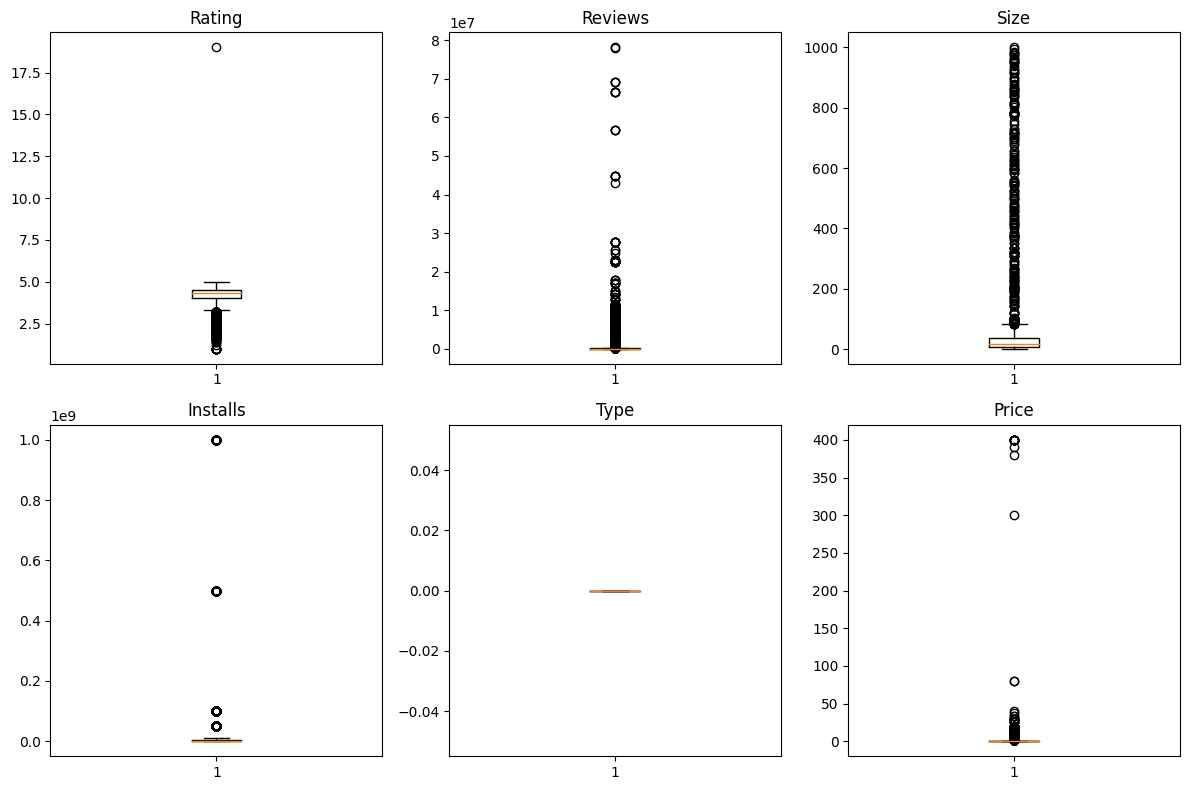

In [5]:
def outlier_count(col):
    q1 = col.quantile(0.25) 
    q3 = col.quantile(0.75) 
    iqr = q3 - q1 

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((col < lower) | (col > upper)).sum()

df = pd.read_excel('GooglePlay.xlsx')

df_tmp = ['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price']

results = pd.DataFrame()

for col_name in df_tmp:
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
    stats = pd.Series(dtype='float64')

    stats["type"] = df[col_name].dtype
    stats["range"] = df[col_name].max() - df[col_name].min()
    stats["min"] = df[col_name].min()
    stats["max"] = df[col_name].max()
    stats["mean"] = df[col_name].mean()
    stats["mode"] = df[col_name].mode()[0] # Take the first mode if there are multiple
    stats["median"] = df[col_name].median()
    stats["outlier"] = outlier_count(df[col_name])
    results[col_name] = stats

results = results.T
print(results)

plt.figure(figsize=(12, 8))

for i, col_name in enumerate(df_tmp, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col_name].dropna())
    plt.title(col_name)

plt.tight_layout()
plt.show()

